# Question 3: Build models using CBFV

**3.1 Regression**

For this problem you will be loading the `matbench_steels` dataset from the matbench benchmark datasets. (https://matbench.materialsproject.org/) To load this datasets, you will need the `matminer` package which can be installed via `pip install matminer` within your MatInformatics python virtual environment. 

a) Load the dataset and explore the distribution of yield strengths with a histogram or violin plot.

In [31]:
from matminer.datasets import load_dataset
import pandas as pd

data = load_dataset("matbench_steels")
print(data)

                                           composition  yield strength
0    Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...          2411.5
1    Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....          1123.1
2    Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....          1736.3
3    Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...          2487.3
4    Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...          2249.6
..                                                 ...             ...
307  Fe0.823C0.0176Mn0.00183Si0.000198Cr0.0779Ni0.0...          1722.5
308  Fe0.823Mn0.000618Si0.00101Cr0.0561Ni0.0984Mo0....          1019.0
309  Fe0.825C0.0174Mn0.00175Si0.000201Cr0.0565Ni0.0...          1860.3
310  Fe0.858C0.0191Mn0.00194Si0.000199Cr0.0753Ni0.0...          1812.1
311  Fe0.860C0.0125Mn0.00274Si0.000198Cr0.00439Ni0....          1139.7

[312 rows x 2 columns]


Text(0.5, 0, 'Yield Strength')

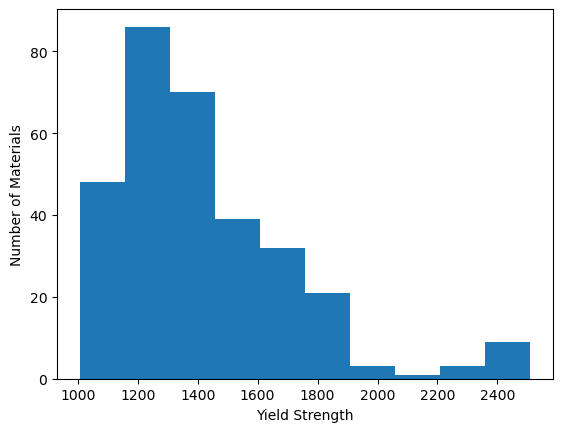

In [32]:
import matplotlib.pyplot as plt

data=data.rename(columns={"yield strength":"yield_strength"})
plt.hist(data.yield_strength)
plt.ylabel("Number of Materials")
plt.xlabel("Yield Strength")

b) Featurize the data using the `CBFV` package. Create three featurized versions of the data: one with the `mat2vec` feature set, one with `magpie`, and one with `oliynyk`. 


In [33]:
from CBFV import composition

#this next step is important!! The CBFV composition.generate_features() function 
#requires an input dataframe with a column named 'formula' and another column named 'target'
data=data.rename(columns={"composition":"formula","yield_strength":"target"})
print(data)

X_mv, y_mv, formulae_mv, skipped_mv = composition.generate_features(data,elem_prop='mat2vec')

X_mp, y_mp, formulae_mp, skipped_mp = composition.generate_features(data,elem_prop='magpie')

X_o, y_o, formulae_o, skipped_o = composition.generate_features(data,elem_prop='oliynyk')

                                               formula  target
0    Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...  2411.5
1    Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....  1123.1
2    Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....  1736.3
3    Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...  2487.3
4    Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...  2249.6
..                                                 ...     ...
307  Fe0.823C0.0176Mn0.00183Si0.000198Cr0.0779Ni0.0...  1722.5
308  Fe0.823Mn0.000618Si0.00101Cr0.0561Ni0.0984Mo0....  1019.0
309  Fe0.825C0.0174Mn0.00175Si0.000201Cr0.0565Ni0.0...  1860.3
310  Fe0.858C0.0191Mn0.00194Si0.000199Cr0.0753Ni0.0...  1812.1
311  Fe0.860C0.0125Mn0.00274Si0.000198Cr0.00439Ni0....  1139.7

[312 rows x 2 columns]


Processing Input Data: 100%|██████████| 312/312 [00:00<00:00, 4394.94it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 312/312 [00:00<00:00, 5032.22it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████| 312/312 [00:00<00:00, 8424.63it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 312/312 [00:00<00:00, 6499.63it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████| 312/312 [00:00<00:00, 8432.72it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 312/312 [00:00<00:00, 5668.30it/s]

	Creating Pandas Objects...


c) Split the dataset into training and testing sets (80% training, 20% testing).



In [34]:
from sklearn.model_selection import train_test_split 
  
# using the train test split function 
X_train_mv, X_test_mv, y_train_mv, y_test_mv = train_test_split(X_mv,y_mv ,test_size=0.2) 

X_train_mp, X_test_mp, y_train_mp, y_test_mp = train_test_split(X_mp,y_mp ,test_size=0.2) 

X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_o,y_o ,test_size=0.2) 


d) Build linear models and compare the performance of 3 different featurization approaches. 

**don't worry if the results are bad! We will get to better models soon!** 


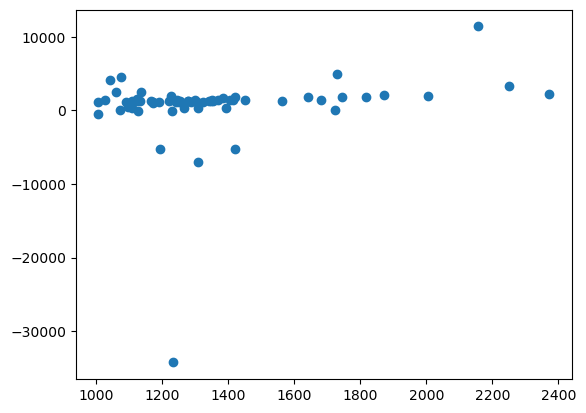

mean squared error is ...
24614545.997194357
r squared is ...
-276.29034152315097


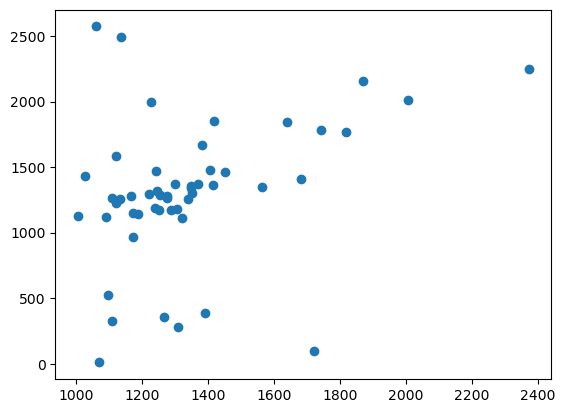

mean squared error is ...
265019.61061889946
r squared is ...
-2.770761094024472


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Make LR model using mat2vec

model_mv = LinearRegression().fit(X_train_mv,y_train_mv)
y_predict_mv = model_mv.predict(X_test_mv)
plt.scatter(y_test_mv,y_predict_mv)
plt.show()
print("mean squared error is ...")
print(mean_squared_error(y_test_mv,y_predict_mv))
print("r squared is ...")
print(r2_score(y_test_mv,y_predict_mv))


# Remove WILDLY huge outlier predictions
# to investigate how the rest of the predictions look
# but obviously cant use the model if its giving 
# wild outlier predictions. 

#print(y_predict_mv)

# convert to dataframe object because I dont know how to find and remove data from numpy array
y_predict_df_mv = pd.DataFrame(y_predict_mv)
y_test_df_mv = pd.DataFrame(y_test_mv)
#print(y_predict_df_mv.shape)
i = y_predict_df_mv[y_predict_df_mv[0]>3000].index
j = y_predict_df_mv[y_predict_df_mv[0]<0].index
#print(i)
#print(y_predict_df[0])
y_predict_df_mv=y_predict_df_mv.drop(i)
y_predict_df_mv=y_predict_df_mv.drop(j)
y_test_df_mv = y_test_df_mv.reset_index()
y_test_df_mv=y_test_df_mv.drop(i)
y_test_df_mv=y_test_df_mv.drop(j)
#print(y_predict_df_mv.shape)
#print(y_test_df_mv.shape)
#print(y_test_df_mv)
plt.scatter(y_test_df_mv['target'],y_predict_df_mv)
plt.show()

# evaluate new mean squared error
print("mean squared error is ...")
print(mean_squared_error(y_test_df_mv['target'],y_predict_df_mv))
print("r squared is ...")
print(r2_score(y_test_df_mv['target'],y_predict_df_mv))


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     18.67
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           9.52e-12
Time:                        16:04:04   Log-Likelihood:                -1130.2
No. Observations:                 249   AIC:                             2710.
Df Residuals:                      24   BIC:                             3502.
Df Model:                         224                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avg_0       1.483e+04   6.29e+05      0.024      0.9

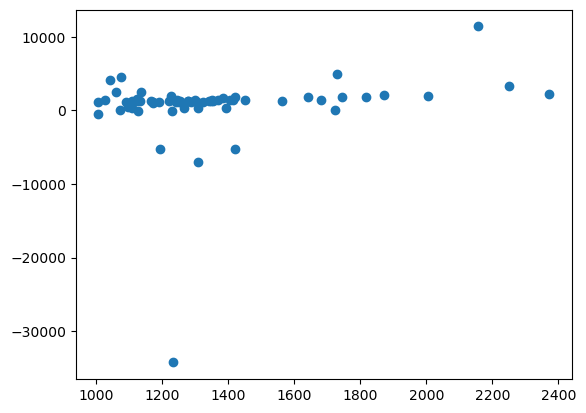

24614520.834626302
-276.2900580591744


In [36]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Make LR model using mat2vec with statsmodels to see if there is any difference
# -- Its not

model_mv_sm =sm.OLS(y_train_mv,X_train_mv).fit()
print(model_mv_sm.summary())
y_predict_mv_sm = model_mv_sm.predict(X_test_mv)
plt.scatter(y_test_mv,y_predict_mv_sm)
plt.show()
print(mean_squared_error(y_test_mv,y_predict_mv_sm))
print(r2_score(y_test_mv,y_predict_mv_sm))

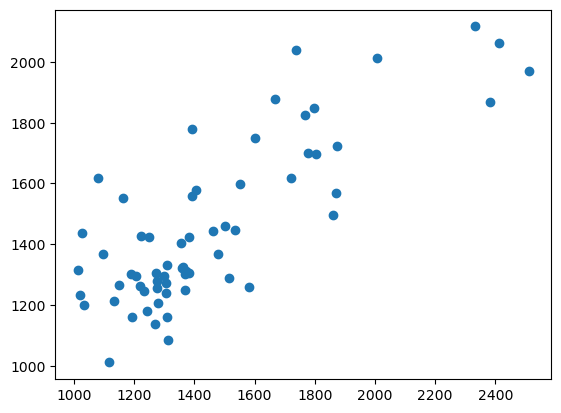

mean squared error is ...
42311.989124348955
r squared is ...
0.6391681141395205


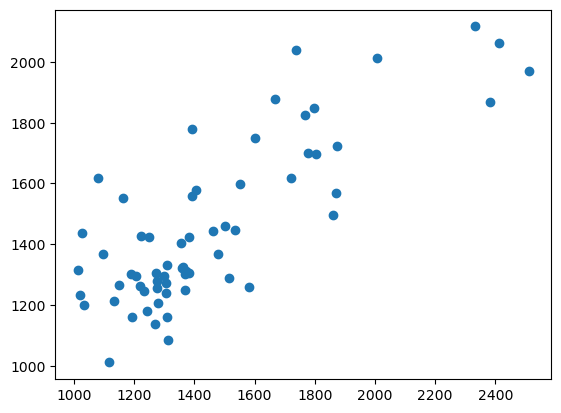

mean squared error is ...
42311.989124348955
r squared is ...
0.6391681141395205


In [37]:
# Using Magpie

model_mp = LinearRegression().fit(X_train_mp,y_train_mp)
y_predict_mp = model_mp.predict(X_test_mp)
plt.scatter(y_test_mp,y_predict_mp)
plt.show()
print("mean squared error is ...")
print(mean_squared_error(y_test_mp,y_predict_mp))
print("r squared is ...")
print(r2_score(y_test_mp,y_predict_mp))

# Remove WILDLY huge outlier predictions
# to investigate how the rest of the predictions look
# but obviously cant use the model if its giving 
# wild outlier predictions. 

# convert to dataframe object because I dont know how to find and remove data from numpy array
y_predict_df_mp = pd.DataFrame(y_predict_mp)
y_test_df_mp = pd.DataFrame(y_test_mp)
#print(y_predict_df_mp.shape)
i = y_predict_df_mp[y_predict_df_mp[0]>3000].index
j = y_predict_df_mp[y_predict_df_mp[0]<1000].index
#print(i)
#print(y_predict_df_mp[0])
y_predict_df_mp=y_predict_df_mp.drop(i)
y_predict_df_mp=y_predict_df_mp.drop(j)
y_test_df_mp = y_test_df_mp.reset_index()
y_test_df_mp=y_test_df_mp.drop(i)
y_test_df_mp=y_test_df_mp.drop(j)
#print(y_predict_df_mp.shape)
#print(y_test_df_mp.shape)
#print(y_test_df_mp)
plt.scatter(y_test_df_mp['target'],y_predict_df_mp)
plt.show()

# evaluate new mean squared error
print("mean squared error is ...")
print(mean_squared_error(y_test_df_mp['target'],y_predict_df_mp))
print("r squared is ...")
print(r2_score(y_test_df_mp['target'],y_predict_df_mp))

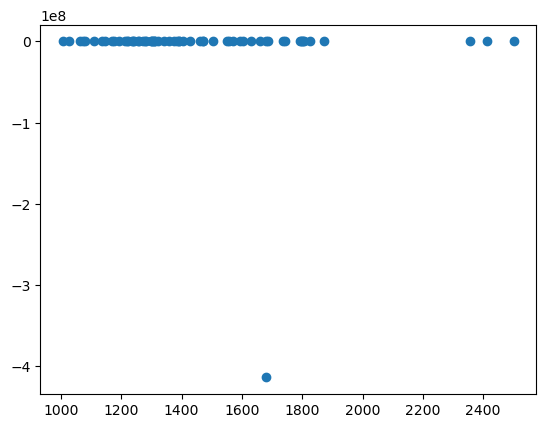

mean squared error is ...
2715770305561729.0
r squared is ...
-27419844264.281406


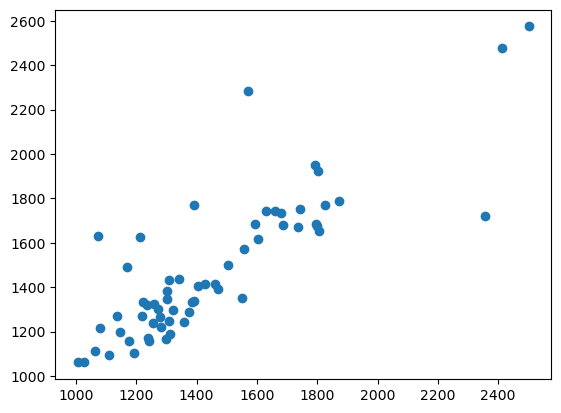

mean squared error is ...
33283.28050204918
r squared is ...
0.6718889756379665


In [38]:
# Using Oliynyk

model_o = LinearRegression().fit(X_train_o,y_train_o)
y_predict_o = model_o.predict(X_test_o)
plt.scatter(y_test_o,y_predict_o)
plt.show()
print("mean squared error is ...")
print(mean_squared_error(y_test_o,y_predict_o))
print("r squared is ...")
print(r2_score(y_test_o,y_predict_o))

# Remove WILDLY huge outlier predictions
# to investigate how the rest of the predictions look
# but obviously cant use the model if its giving 
# wild outlier predictions. 

# convert to dataframe object because I dont know how to find and remove data from numpy array
y_predict_df_o = pd.DataFrame(y_predict_o)
y_test_df_o = pd.DataFrame(y_test_o)
#print(y_predict_df_o.shape)
i = y_predict_df_o[y_predict_df_o[0]>3000].index
j = y_predict_df_o[y_predict_df_o[0]<1000].index
#print(i)
#print(y_predict_df_o[0])
y_predict_df_o=y_predict_df_o.drop(i)
y_predict_df_o=y_predict_df_o.drop(j)
y_test_df_o = y_test_df_o.reset_index()
y_test_df_o=y_test_df_o.drop(i)
y_test_df_o=y_test_df_o.drop(j)
#print(y_predict_df_o.shape)
#print(y_test_df_o.shape)
#print(y_test_df_o)
plt.scatter(y_test_df_o['target'],y_predict_df_o)
plt.show()

# evaluate new mean squared error
print("mean squared error is ...")
print(mean_squared_error(y_test_df_o['target'],y_predict_df_o))
print("r squared is ...")
print(r2_score(y_test_df_o['target'],y_predict_df_o))

e) For your best model, create a residual plot and a parity plot. 

Look for systematic patterns in your residual


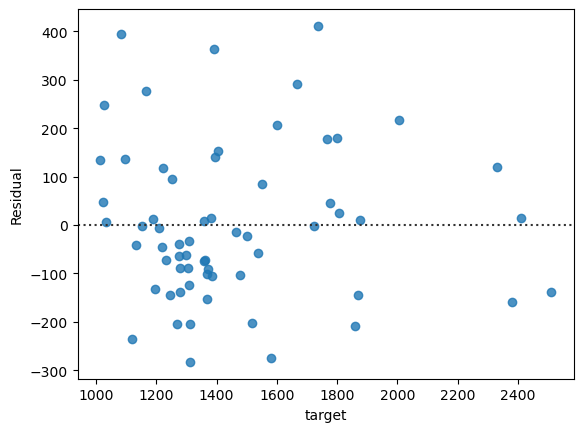

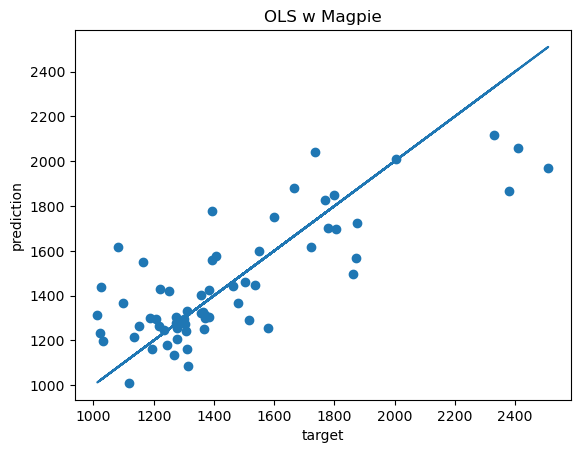

mean squared error of prediction is ...
42311.989124348955
r squared of prediction is ...
0.6391681141395205


In [39]:
import seaborn as sns

# Residual Plot

y_predict_df_mp=y_predict_df_mp.rename(columns={0:"prediction"})
#print(y_predict_df_o)

# Using Magpie Dataset
sns.residplot(x=y_test_df_mp['target'], y=y_predict_df_mp, order=1)
plt.ylabel("Residual")
plt.show()

# Parity Plot

plt.scatter(y_test_mp,y_predict_mp)
plt.plot(y_test_mp,y_test_mp)
plt.xlabel("target")
plt.ylabel("prediction")
plt.title("OLS w Magpie")
plt.show()
print("mean squared error of prediction is ...")
print(mean_squared_error(y_test_mp,y_predict_mp))
print("r squared of prediction is ...")
print(r2_score(y_test_mp,y_predict_mp))





f) Use your best model to predict the yield strength of a new steel composition Fe0.6Ni0.3Co0.2


In [40]:
d={"formula":["Fe0.6Ni0.3Co0.2"],"target":[""]}
df = pd.DataFrame(data=d)

# magpie had the most reasonable outlier predictions (i.e no e11 values)
X, y, formulae, skipped = composition.generate_features(df,elem_prop='magpie')

y_predict = model_mp.predict(X)
print(y_predict)



Processing Input Data: 100%|██████████| 1/1 [00:00<00:00, 998.88it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 1/1 [00:00<00:00, 998.88it/s]

	Creating Pandas Objects...


[7792.46875]


g) Now it's time to think about the model you've built and tried using! Discuss why this dataset was appropriate or not for the task given. 

**<span style="color:teal">put your discussion here</span>**


The best model I got using Magpie only had an R^2 value of 0.5 on its predictions which is pretty low. Due to the low R^2 value on the predictions I would say this model is not a good fit for the data. This is a somewhat expected result as yield strength is likely not going to vary linearly with composition.

**3.2 Classification**

Now let's try a classification task! 

a) Download the `matbench_expt_is_metal` dataset, featurize with your choice of feature set, and employ a logistic regression (linear classifier). Report metrics and performance. 

In [41]:
# Load the matbench_steels dataset
dataset = load_dataset("matbench_expt_is_metal")
df = pd.DataFrame(dataset)

print(df)
df=df.rename(columns={"composition":"formula","is_metal":"target"})

X, y, formulae, skipped = composition.generate_features(df,elem_prop='magpie')

            composition  is_metal
0              Ag(AuS)2      True
1            Ag(W3Br7)2      True
2      Ag0.5Ge1Pb1.75S4     False
3     Ag0.5Ge1Pb1.75Se4     False
4                Ag2BBr      True
...                 ...       ...
4916             ZrTaN3     False
4917               ZrTe      True
4918             ZrTi2O      True
4919             ZrTiF6      True
4920               ZrW2      True

[4921 rows x 2 columns]


Processing Input Data:   0%|          | 0/4921 [00:00<?, ?it/s]

Processing Input Data: 100%|██████████| 4921/4921 [00:00<00:00, 8678.47it/s] 


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 4921/4921 [00:00<00:00, 7002.51it/s]


	Creating Pandas Objects...


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# using the train test split function 
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2) 

model = LogisticRegression().fit(X_train,y_train)
y_predict=model.predict(X_test)
print(accuracy_score(y_test,y_predict))
print(precision_score(y_test,y_predict))
print(recall_score(y_test,y_predict))
print(f1_score(y_test,y_predict))

0.8182741116751269
0.8258317025440313
0.82421875
0.8250244379276637


c:\Miniconda3\envs\MatInformatics\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
